<a href="https://colab.research.google.com/github/1901010019/1901010019.github.io/blob/master/linear_regression_internshala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/Transformed_Housing_Data2.csv')

In [3]:
sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({'sale_price': sale_price, 'flat_area': flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


No handles with labels found to put in legend.


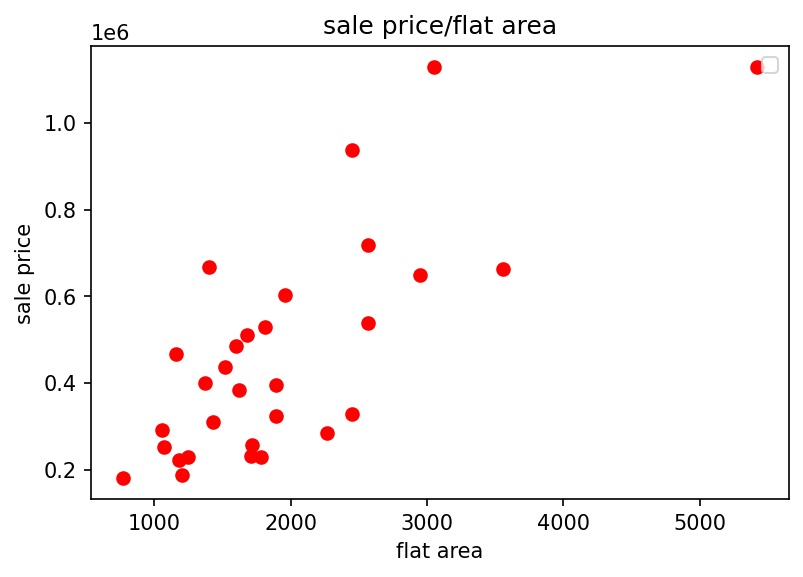

In [4]:
plt.figure(dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color='red')
plt.xlabel('flat area')
plt.ylabel('sale price')
plt.title('sale price/flat area')
plt.legend()
plt.show() 

Text(0.5, 1.0, 'slope 200 with mse 33316584458.333332')

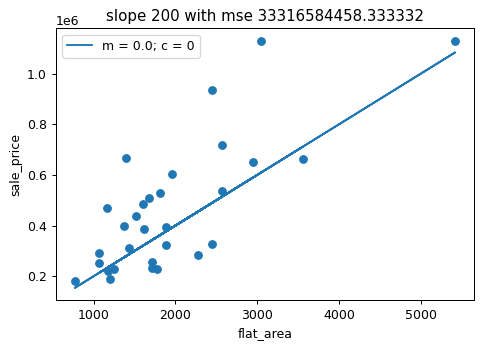

In [5]:
from sklearn.metrics import mean_squared_error
c = 0
m = 200 
line = []
for i in range(len(sample_data)):
  line.append(sample_data.flat_area[i]*m+c)

plt.figure(dpi=90)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label = 'm = 0.0; c = 0')
plt.xlabel('flat_area')
plt.ylabel('sale_price')
plt.legend()
mse = mean_squared_error(sample_data.sale_price, line)
plt.title('slope '+str(m)+' with mse '+ str(mse))

In [6]:
def slope_intercept(slope,intercept,sample_data):
  sale  = []
  for i in range(len(sample_data.flat_area)):
    tmp = sample_data.flat_area[i]*slope+intercept
    sale.append(tmp)
  mse = mean_squared_error(sample_data.sale_price,sale)
  return mse

In [7]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
  cost = slope_intercept(slope=i, intercept = 10834, sample_data=sample_data)
  Cost.append(cost)

In [8]:
cost_table = pd.DataFrame(
    {'slope':slope,'cost':Cost}
)
cost_table.tail()

,slope,cost
4995,499.5,3.636767e+11
4996,499.6,3.639259e+11
4997,499.7,3.641751e+11
4998,499.8,3.644245e+11
4999,499.9,3.646739e+11


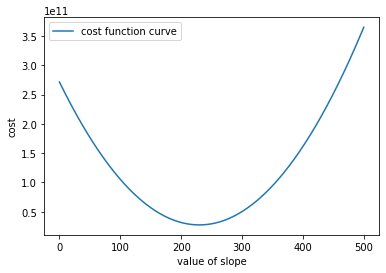

In [9]:
plt.plot(cost_table.slope, cost_table.cost, label = 'cost function curve')
plt.xlabel('value of slope')
plt.ylabel('cost')
plt.legend()
# this is the cost/loss function curve 

In [10]:
def intercept_error(slope,intercept,sample_data):
  sale=[]
  for i in range(len(sample_data.flat_area)):
    tmp = sample_data.flat_area[i]*slope+intercept
    sale.append(tmp)
  mse = mean_squared_error(sample_data.sale_price,sale)
  return mse

In [11]:
intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
  cost = intercept_error(slope =234, intercept=i, sample_data=sample_data)
  Cost.append(cost)

In [12]:
cost_table = pd.DataFrame(
    {'intercept':intercept,'cost':Cost}
)
cost_table.head()

,intercept,cost
0,5000,2.779911e+10
1,5001,2.779909e+10
2,5002,2.779908e+10
3,5003,2.779907e+10
4,5004,2.779906e+10


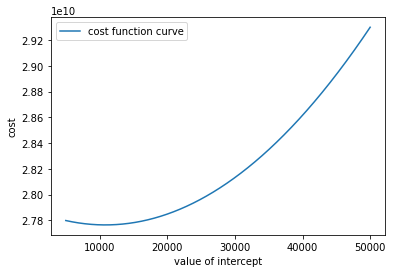

In [13]:
plt.plot(cost_table.intercept, cost_table.cost, label = 'cost function curve')
plt.xlabel('value of intercept')
plt.ylabel('cost')
plt.legend()

### **implementing gradient descent**

In [14]:
def param_init(y):
  m=0.1
  c=y.mean()
  return m,c

In [15]:
def generate_predictions(m,c,X):
  prediction = []
  for x in X:
    pred = m*x+c
    prediction.append(pred)
  return prediction

In [16]:
def compute_cost(prediction,Y):
  cost = np.sum(((prediction - Y)**2)/len(Y))
  return cost

In [17]:
def gradients(prediction, Y, X):
  n = len(Y)
  Gm = 2/n * np.sum((prediction-Y)*X)
  Gc = 2/n * np.sum((prediction-Y))
  return Gm, Gc

In [18]:
def param_update(m_old, c_old, Gm_old, Gc_old):
  m_new = m_old - alpha * Gm_old
  c_new = c_old - alpha * Gc_old
  return m_new, c_new

In [19]:
def result(m,c,X,Y,cost,prediction,i):
  if i< max_itr -1:
    print('gradient descent has converged'.format(i))
  else:
    print('result after ', max_itr,' iterations is: ')

  plt.figure(figsize=(14,7), dpi = 120)
  plt.scatter(X, Y, color='red', label='data points')
  label = 'final regression line: m = {}; c = {}'.format(str(m), str(c))
  plt.plot(X, predictions, color='green', label = label)
  plt.xlabel('flat_area')
  plt.ylabel('sale_price')
  plt.title('final regression line')
  plt.legend()

after iteration 0 : m= 0.11316346413633305 ; c =  1.1849780416165836e-16 ; cost = 0.85836535863667
after iteration 20 : m= 0.3275595607435688 ; c =  1.240489192847842e-16 ; cost = 0.6182472245590185
after iteration 40 : m= 0.4706921039517346 ; c =  1.3248661427193537e-16 ; cost = 0.5112264752046607
after iteration 60 : m= 0.5662485308150865 ; c =  1.415904430738617e-16 ; cost = 0.46352728398628984
after iteration 80 : m= 0.6300427631414932 ; c =  1.4951003398285442e-16 ; cost = 0.4422677351921283
after iteration 100 : m= 0.6726323011945988 ; c =  1.611303683072644e-16 ; cost = 0.4327923457067555
after iteration 120 : m= 0.7010654163122192 ; c =  1.666074685620818e-16 ; cost = 0.42856916078553225
after iteration 140 : m= 0.7200475906265729 ; c =  1.6660746856208182e-16 ; cost = 0.4266868855601835
after iteration 160 : m= 0.7327202415200801 ; c =  1.669405354694694e-16 ; cost = 0.42584795473189874
after iteration 180 : m= 0.7411806042798547 ; c =  1.6694053546946945e-16 ; cost = 0.425474

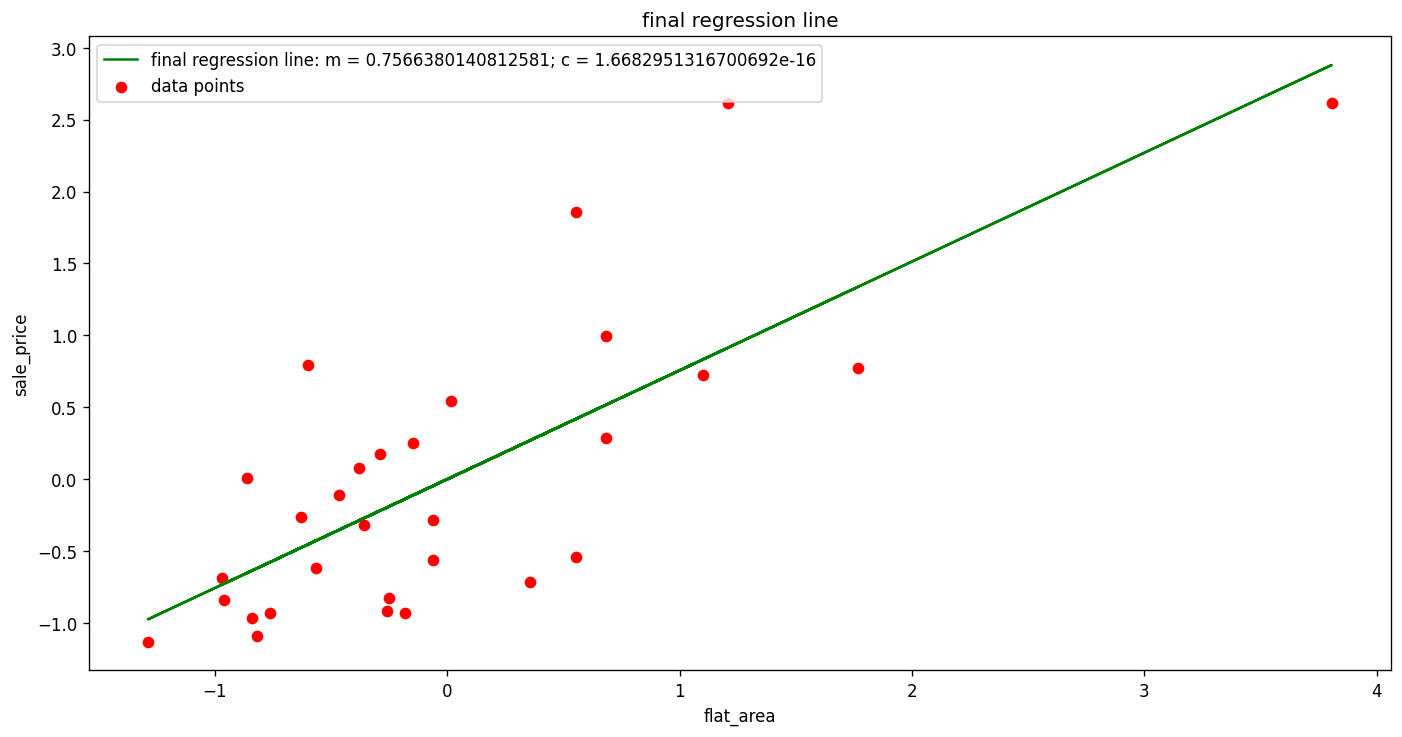

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area  = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

max_itr = 1000
cost_old = 0
alpha = 0.01

m,c = param_init(sale_price)

for i in range(0,max_itr):
  predictions = generate_predictions(m,c, flat_area)
  cost_new = compute_cost(predictions,sale_price)
  if abs(cost_new - cost_old)<10**(-7):
    break
  Gm, Gc = gradients(predictions, sale_price, flat_area)
  m,c = param_update(m,c,Gm,Gc)
  if i%20 ==0:
    print('after iteration', i, ': m=', m, '; c = ', c,'; cost =', cost_new)
  cost_old = cost_new

result(m,c,flat_area,sale_price,cost_new,predictions,i)  

implementing linear regression

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('/content/Transformed_Housing_Data2.csv')

In [23]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [24]:
# scalinf the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = data['Sale_Price']
x = scaler.fit_transform(data.drop(columns = ['Sale_Price']))
x = pd.DataFrame(data = x , columns=data.drop(columns=['Sale_Price']).columns)
x.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,-0.306226,-0.943307,-0.260741,-0.167463,-0.292306,0.735132,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,-0.746479,-0.432664,-0.187900,4.757239,-0.292306,0.735132,-0.597003,-0.089574,4.758385,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,-0.135806,1.070082,-0.172409,-0.167463,-0.292306,0.735132,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,-1.271941,-0.914127,-0.284546,-0.167463,3.421068,-1.360300,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,1.199152,-0.272177,-0.192880,-0.167463,-0.292306,0.735132,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [25]:
data['Sale_Price'].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: Sale_Price, dtype: float64

In [26]:
# checking and removing multicolinearity.
x.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,-0.008708,0.129569,0.391771,0.029264,-0.007198,0.028148,0.004778,-0.008847,-0.051957,0.018573,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,0.024570,0.223171,0.568568,0.087226,0.003551,-0.034281,0.190440,-0.166037,-0.077419,0.050282,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,0.052538,0.240091,0.756185,0.183223,0.023503,-0.018182,0.102627,-0.083995,-0.065334,0.055111,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,-0.085719,0.229449,0.144507,0.718527,0.013835,-0.014503,-0.011334,0.013033,0.037619,0.007736,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,0.049692,0.125620,0.280106,-0.011204,-0.000901,-0.120524,0.317934,-0.257680,-0.055951,0.006297,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,0.006162,-0.078453,0.280452,0.072561,0.093546,0.034392,-0.037127,0.022690,-0.018557,0.104051,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,0.111226,0.201736,0.681362,0.107581,-0.024388,-0.082628,0.197510,-0.140113,-0.090561,0.010010,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,-0.000819,0.343793,0.731996,0.194106,0.010491,-0.088424,0.194517,-0.142458,-0.058931,0.023202,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,0.110451,-0.144822,0.200302,0.017263,0.029158,0.127876,-0.151347,0.092539,-0.025312,0.070969,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,0.148083,-0.409515,-0.326307,-0.071016,0.203375,0.244330,-0.391693,0.257392,0.067269,0.225182,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [27]:
k = x.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] > abs(0.5))& (i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

**important method for multicolinearity removal**

In [28]:
# now we will use VIF for multicolinearity removal
from statsmodels.stats.outliers_influence import  variance_inflation_factor
vif_data = x

VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index= vif_data.columns)
VIF

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [29]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [30]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() >5:
    print(vif[vif == vif.max()].index[0], ' has been removed')
    data = data.drop(columns = [vif[vif==vif.max()].index[0]])
    return data
  else:
    print('no multicolinearity')
    return data

In [31]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Flat Area (in Sqft)  has been removed
Condition_of_the_House_Fair  has been removed
no multicolinearity
no multicolinearity
no multicolinearity
no multicolinearity
no multicolinearity


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,-0.306226,-0.943307,-0.260741,-0.167463,-0.292306,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,-0.746479,-0.432664,-0.187900,4.757239,-0.292306,-0.597003,-0.089574,4.758385,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,-0.135806,1.070082,-0.172409,-0.167463,-0.292306,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,-1.271941,-0.914127,-0.284546,-0.167463,3.421068,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,1.199152,-0.272177,-0.192880,-0.167463,-0.292306,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [32]:
# calculating VIF for remaning columns
vif = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
vif, len(vif_data.columns)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years Since Renovation                       2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Ever_Renovated_Yes                           2.955539
 Waterfron

In [33]:
# training the model
x = vif_data
y = data['Sale_Price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3, random_state=101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize = True) # since we have normalize the data, the value of the intercept will be zero.
regressor.fit(x_train,y_train) # this regressor.fit() function implements the gradient descent and the complete procedure over the training data.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [35]:
regressor.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  14594.33847962,  10761.77007875,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [36]:
# generating the predictions
predictions = regressor.predict(x_test)
regressor.score(x_test,y_test) # this function takes the test dataset and internally performs the prediction and calculate R^2 value and accuracy score in case of classification model.

0.8461987715586199

In [37]:
# now we will verify different assumptions made by us for linear regression model previously

plotting residuals

In [38]:
residuals = predictions - y_test
residual_table = pd.DataFrame({'residuals': residuals,
                               'predictions': predictions})
residual_table = residual_table.sort_values( by = 'predictions')
residual_table

,residuals,predictions
1147,-226899.922361,-1.518999e+05
19450,-210795.272576,-6.879527e+04
4201,-140057.717848,9.942282e+03
11586,-156956.559744,3.104344e+04
13714,-145500.198922,3.449980e+04
...,...,...
6506,369963.447042,1.499538e+06
9252,398475.423771,1.528050e+06
15253,441105.516766,1.570681e+06
18475,444424.624355,1.574000e+06


In [39]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

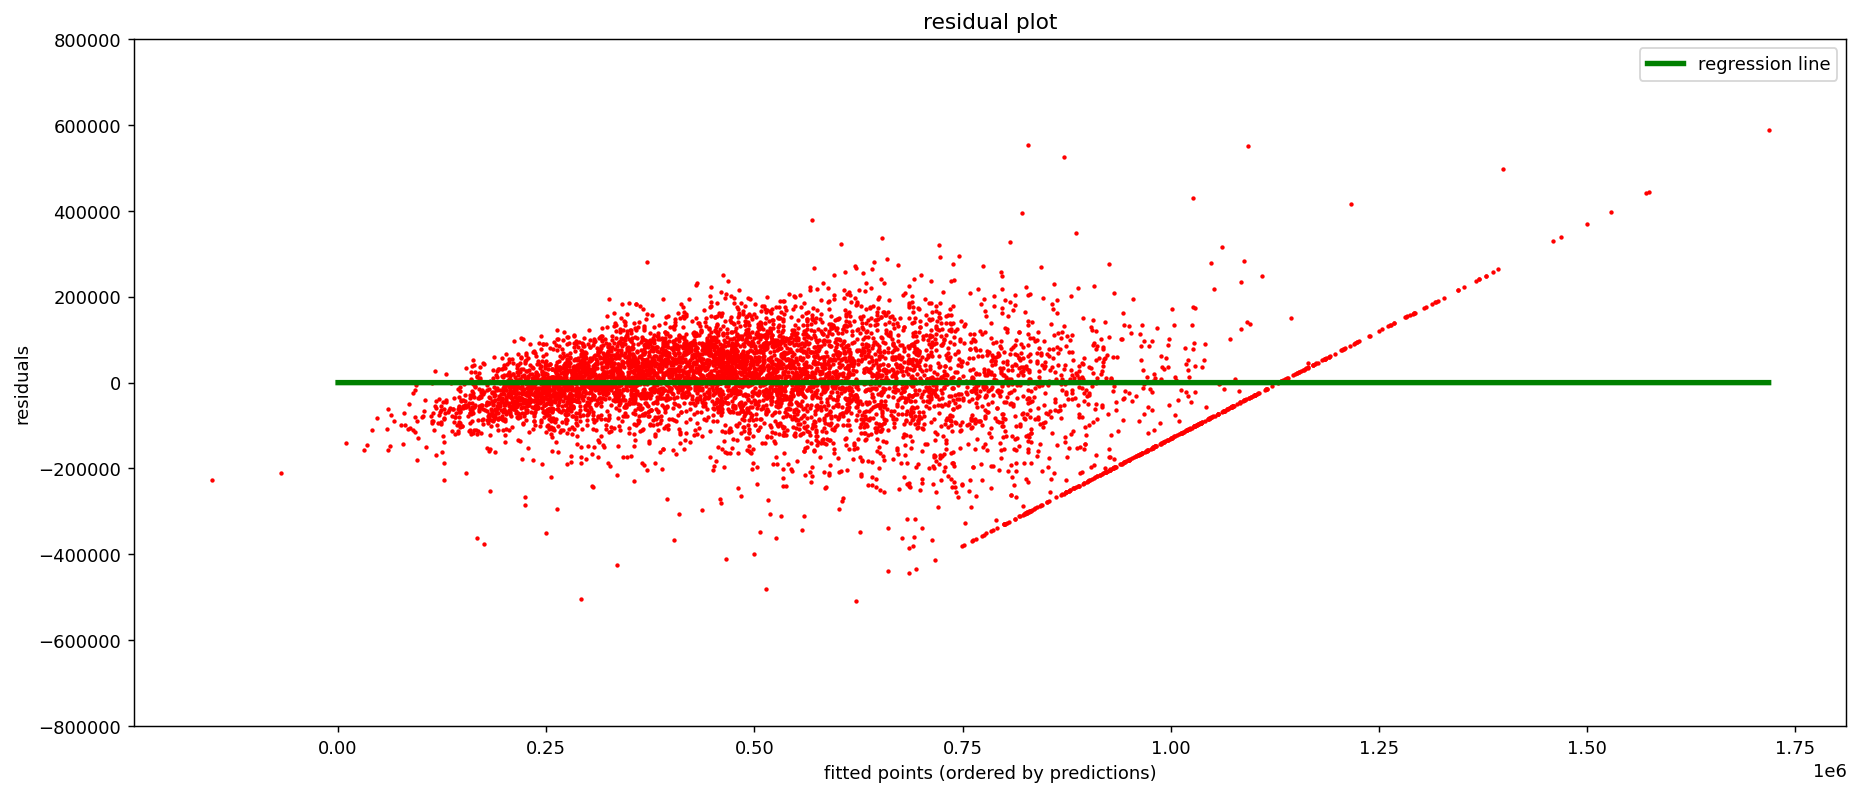

In [40]:
plt.figure(dpi = 130, figsize=(17,7))
plt.scatter(residual_table['predictions'], residual_table['residuals'], color = 'red', s=2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000,800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

distribution of errors

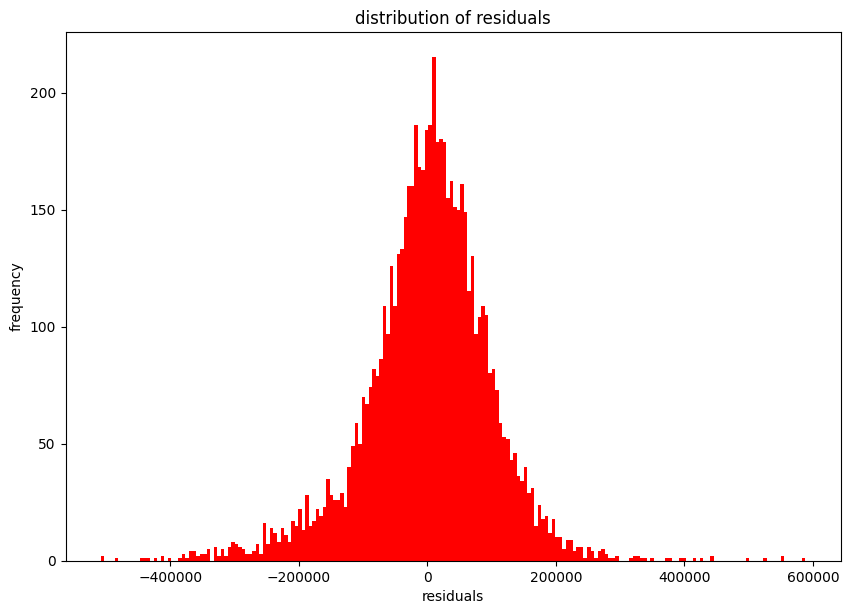

In [41]:
plt.figure(dpi = 100, figsize=(10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

magnitude of the coefficient

In [42]:
# using bar graph we will analyze the coefficients
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                   'coefficients': regressor.coef_})
coefficients_table = coefficients_table.sort_values(by = 'coefficients')
coefficients_table

,column,coefficients
10,Longitude,-23854.326402
13,Years Since Renovation,-10179.085198
0,No of Bedrooms,-3928.662476
12,Lot Area after Renovation (in Sqft),-2896.985429
16,Condition_of_the_House_Okay,-2296.648881
3,No of Floors,2697.552786
15,Condition_of_the_House_Good,5095.976036
18,Waterfront_View_Yes,10761.770079
1,No of Bathrooms,12028.445607
19,Zipcode_Group_Zipcode_Group_1,12165.833721


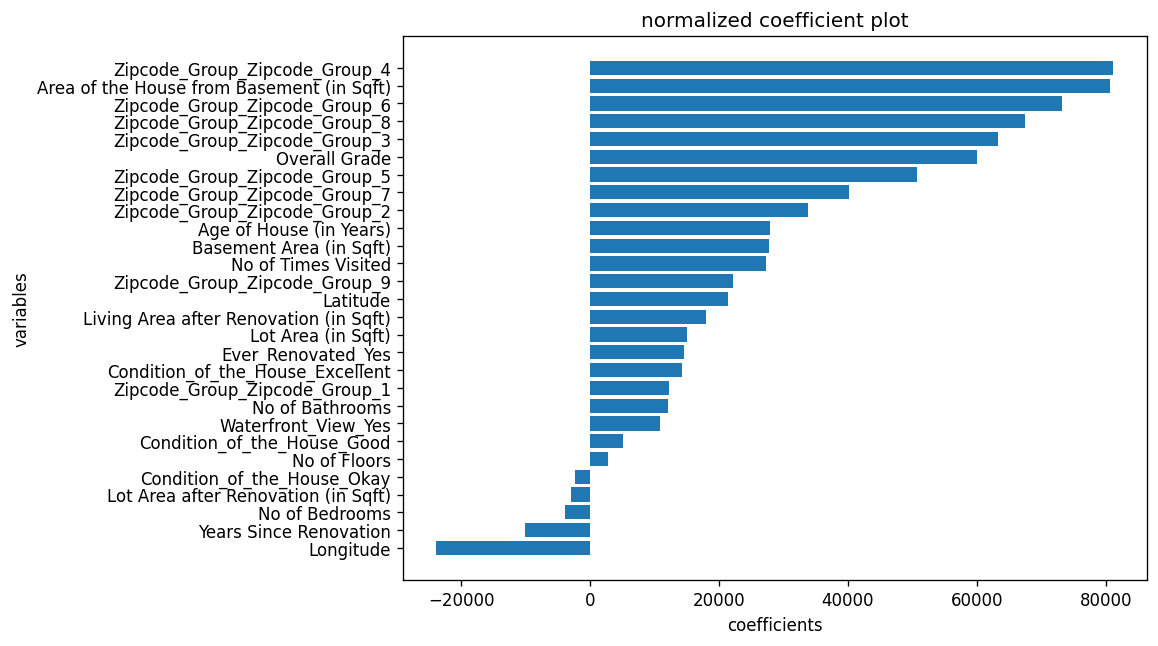

In [43]:
plt.figure(figsize=(8,6), dpi = 120)
x = coefficients_table['column']
y = coefficients_table['coefficients']
plt.barh(x,y)
plt.xlabel('coefficients')
plt.ylabel('variables')
plt.title('normalized coefficient plot')
plt.show()

feature engineering

In [44]:
data = pd.read_csv('/content/1. Regression - Module - (Housing Prices).csv')

In [45]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


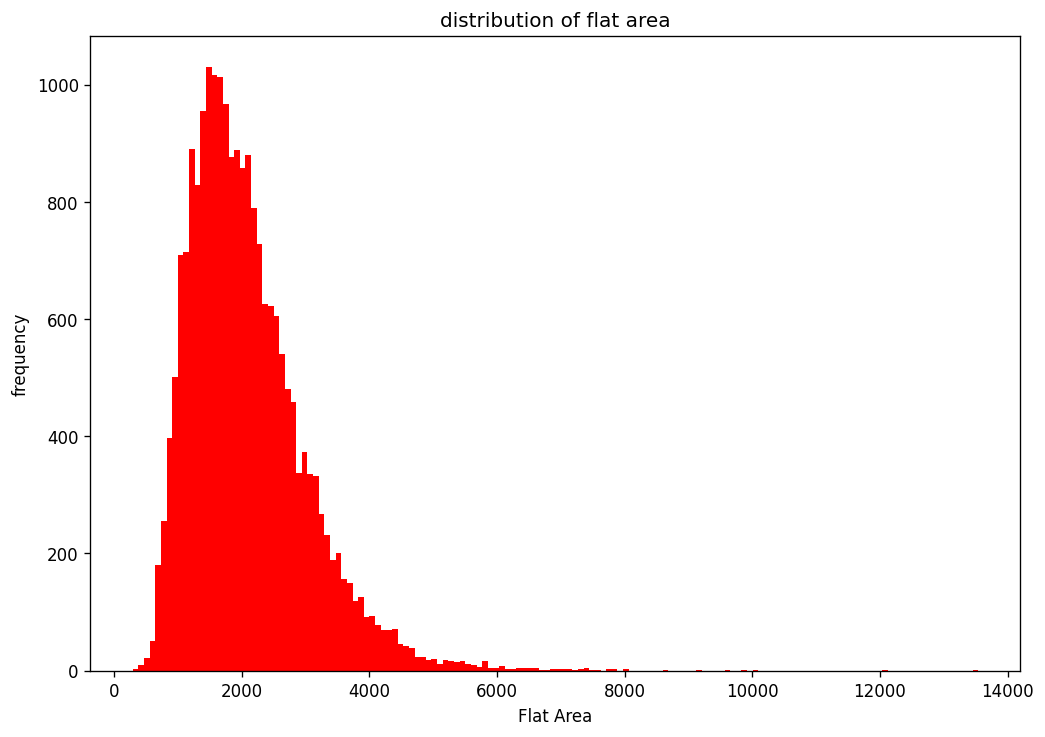

In [46]:
plt.figure(figsize= (10,7), dpi = 120)
plt.hist(data['Flat Area (in Sqft)'], bins=150, color='red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('distribution of flat area')
plt.show()

In [47]:
# it is right skewed, therefore we will apply log transform
def log_transform(sample_data):
  return np.log(sample_data)

In [48]:
data['Transform flat area'] = data['Flat Area (in Sqft)'].map(log_transform)
data['Transform flat area'].head()

0    7.073270
1    7.851661
2    6.646391
3    7.580700
4    7.426549
Name: Transform flat area, dtype: float64

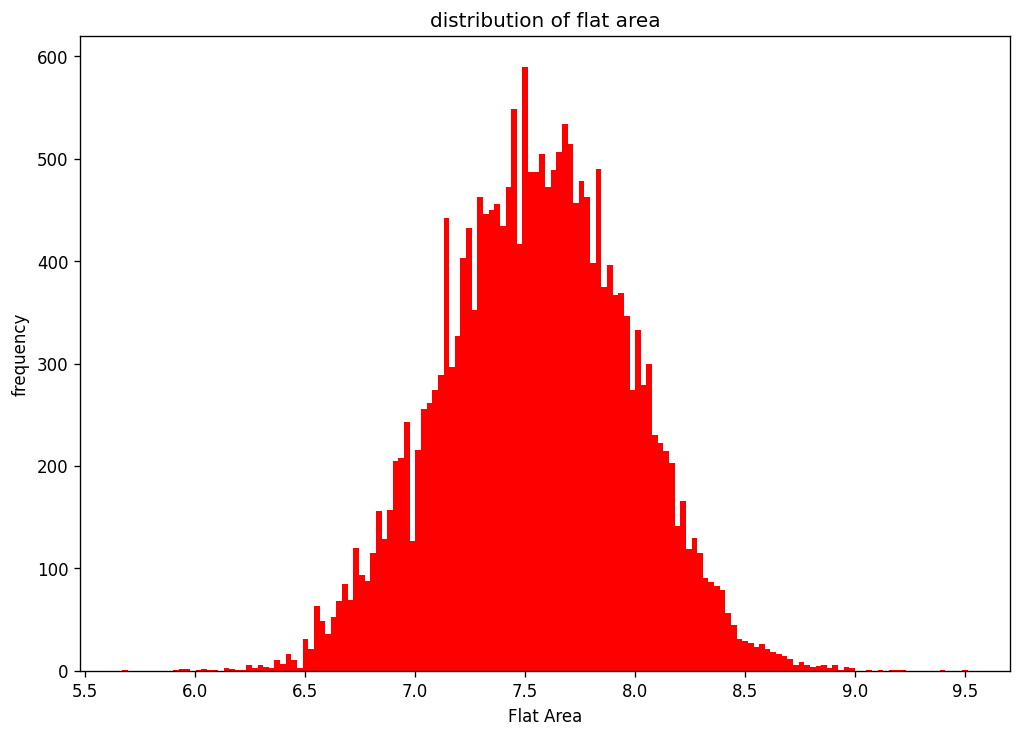

In [49]:
plt.figure(figsize = (10,7), dpi = 120)
plt.hist(data['Transform flat area'], bins=150, color='red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('distribution of flat area')
plt.show()

sparse binning

In [50]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [51]:
data['Condition of the House'].value_counts()

Fair         14031
Good          5679
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [53]:
# as number of counts of okay and bad are very few, it's good idea to sparse bin  them.
mean = []
for i in data['Condition of the House'].unique():
  mean.append(data['Sale Price'][data['Condition of the House']==i].mean())
# above code will take the mean of all the sale prices corresponding to the condition of the house.

In [56]:
mean

[542130.6112061591,
 612577.7425044092,
 521277.51056710107,
 334431.6666666667,
 327316.2151162791]

Text(0, 0.5, 'mean sale price')

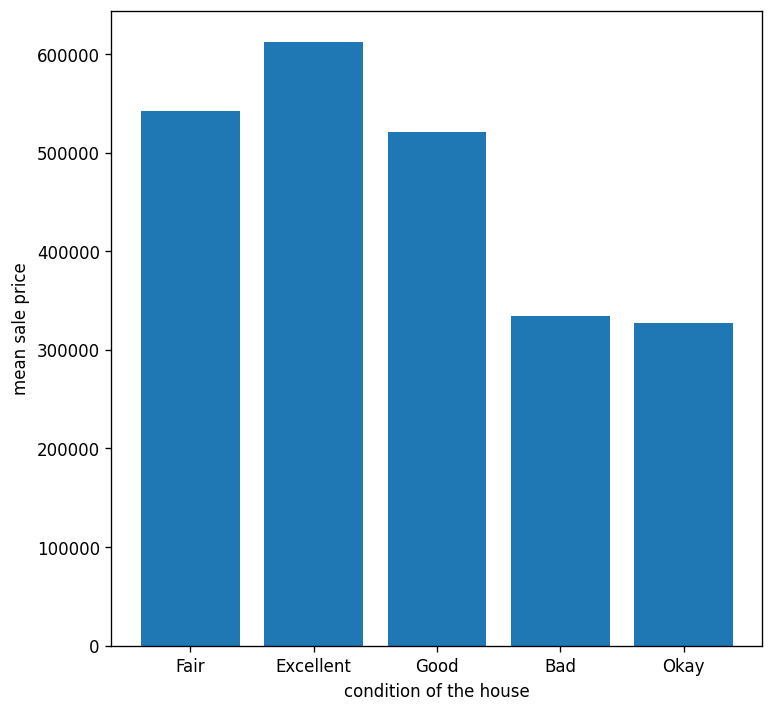

In [57]:
plt.figure(figsize=(7,7), dpi = 120)
plt.bar(data['Condition of the House'].unique(), mean)
plt.xlabel('condition of the house')
plt.ylabel('mean sale price')
# what we can see from the graph is that average sale price for bad and okay and fair and good is quite same, so having these two different variables would make our dataset redundant.

In [59]:
mapping = {
    'Excellent':'Excellent',
    'Fair':'Good',
    'Good':'Good',
    'Okay':'Okay',
    'Bad':'Okay'
}
data['Condition of the House'] = data['Condition of the House'].map(mapping)

In [60]:
mean = []
for i in data['Condition of the House'].unique():
  mean.append(data['Sale Price'][data['Condition of the House']==i].mean())

Text(0, 0.5, 'mean sale price')

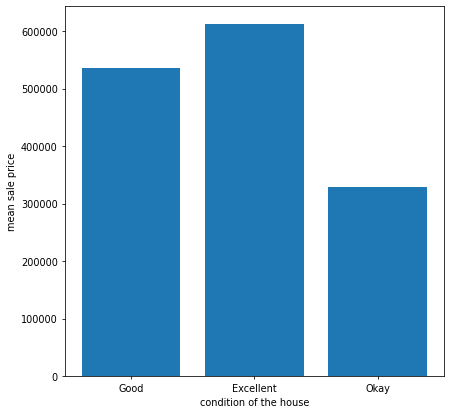

In [63]:
plt.figure(figsize=(7,7), dpi = 70)
plt.bar(data['Condition of the House'].unique(), mean)
plt.xlabel('condition of the house')
plt.ylabel('mean sale price')
# we simply repeated the above process of calculation of mean and plotting the bar graph.
# in this bar plot we can see the difference is significant.

In [64]:
# doing binning for numerical variables
len(data['Age of House (in Years)'].unique())

116

In [65]:
data['Age of House (in Years)'].max()

118

In [66]:
data['Age of House (in Years)'].min()

3

In [ ]:
# the house which is 40 and 42 years old, will not make substantial difference in the model prediction considering those house have every other property same.


In [67]:
def age_of_house(x):
  if x<10:
    x = 'new'
  elif x<50:
    x = 'old'
  else :
    x = 'very old'
  return x


In [68]:
cat_house_age = data['Age of House (in Years)'].map(age_of_house)
cat_house_age.unique()

array(['very old', 'old', 'new'], dtype=object)

In [ ]:
# now we can convert above categorical variables into dummy variables
# it is not always advisable to bin continious variabales as it may result in loss of data.


**feature generation**

In [ ]:
# 1. feature extraction.
# 2. combination of features.